In [18]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
now = datetime.datetime.now()
import seaborn as sns
sns.set(color_codes=True)
from config import consumer_key,consumer_secret,access_token,access_token_secret
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



ImportError: cannot import name 'banlist'

In [12]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Accounts
target_user = ["@BBCWorld", "@CBS", "@CNN","@FoxNews","@nytimes"]



In [13]:
# Loop through each user
compound_list=[]
positive_list = []
negative_list = []
neutral_list = []
dates=[]
account=[]
texts=[]
for user in target_user:
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1,6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user,page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            account.append(user)
            texts.append(tweet['text'])
            dates.append(tweet['created_at'])

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]


            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)


In [14]:
e={'Compound Score':compound_list,'Positive Score':positive_list,'Negative Score':negative_list,'Neutral Score':neutral_list,'Time of Tweet':dates,'Author of Tweet':account,'Text':texts}
f=pd.DataFrame(e)
f.to_csv('output.csv', sep=',')
f.head()

,Author of Tweet,Compound Score,Negative Score,Neutral Score,Positive Score,Text,Time of Tweet
0,@BBCWorld,0.0000,0.000,1.000,0.00,Madrid police dogs get 'Mozart effect' music t...,Wed Mar 28 15:37:10 +0000 2018
1,@BBCWorld,0.2235,0.000,0.910,0.09,"RT @BBCNews: ""I have cerebral palsy. But that ...",Wed Mar 28 15:31:26 +0000 2018
2,@BBCWorld,-0.7096,0.457,0.543,0.00,Alexandre Bissonnette pleads guilty to Quebec ...,Wed Mar 28 14:46:13 +0000 2018
3,@BBCWorld,-0.4767,0.279,0.721,0.00,Clara Ponsati: Arrested Catalan politician rel...,Wed Mar 28 14:34:06 +0000 2018
4,@BBCWorld,-0.5574,0.419,0.581,0.00,Australia bans cricketers over cheating https:...,Wed Mar 28 14:06:10 +0000 2018


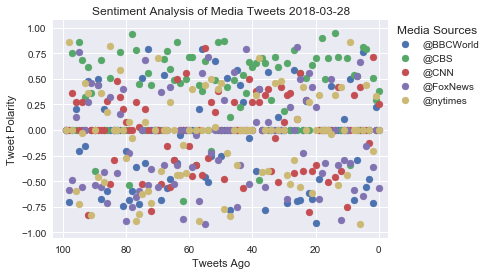

In [15]:
xval=[i for i in range(100)]
for i in target_user:
    plt.scatter(xval,f.groupby('Author of Tweet').get_group(i)['Compound Score'])
plt.xlim(103, -3)
plt.legend(target_user,bbox_to_anchor=(.3, 0, 1., 1.02),title='Media Sources')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets '+ now.strftime("%Y-%m-%d"))
plt.show()

In [16]:
#Averages
averages=f.groupby('Author of Tweet')['Compound Score'].mean()
strings=[]
for i in averages:
    strings.append('{0:.2f}'.format(i))
abovezero=[]
for i in averages:
    if i>0:
        abovezero.append('g')
    else:
        abovezero.append('r')

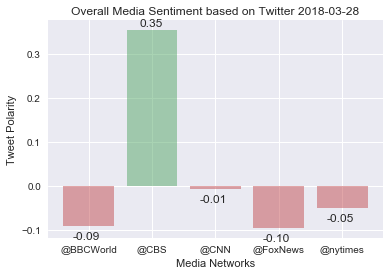

In [17]:
#Tumor Change Graph
x_axis = np.arange(len(averages))
plt.bar(x_axis,averages, color=abovezero, align="edge",alpha=.5)
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, target_user)
plt.xlabel('Media Networks')
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment based on Twitter '+ now.strftime("%Y-%m-%d"))
for i in range(len(averages)):
    if averages[i]>0:
        plt.text(x=x_axis[i]+.2,y=averages[i]+.01,s=strings[i])
    else:
        plt.text(x=x_axis[i]+.15,y=averages[i]-.03,s=strings[i])
plt.show()